In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Correlation and Regression

Last chapter we saw that correlations can tell us about the strength of a linear relationship between variables. However, the correlation coefficient is far from everything when it comes to linear relationships. For instance, comparing the graphs below for two data sets we see that the relationship between x's and the y's are different, but the correlation coefficients are identical.

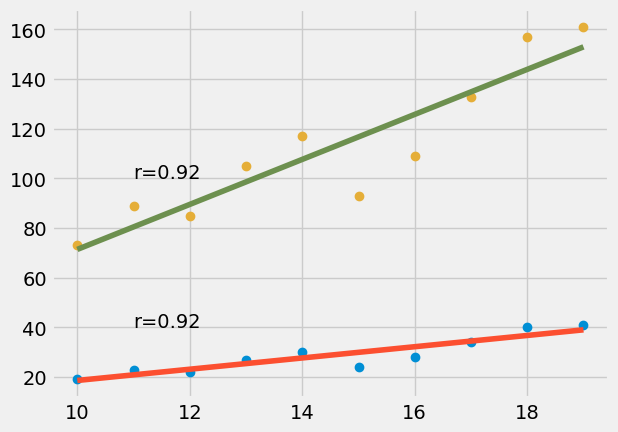

In [11]:
x1 = np.arange(10, 20)
y1 = np.array([19, 23, 22, 27, 30, 24, 28, 34, 40, 41])
z1 = np.polyfit(x1, y1, 1) 
p = np.poly1d(z1)
r1 = np.corrcoef(x1,y1)[0,1]
plt.plot(x1, y1, "o");
plt.plot(x1, p(x1), "-");
plt.text(x=11,y=40,s="r={}".format(round(r1,2)));

x2 = np.arange(10, 20)
y2 = np.array([ 73,  89,  85, 105, 117,  93, 109, 133, 157, 161])
z2 = np.polyfit(x2, y2, 1)
p = np.poly1d(z2)
r2 = np.corrcoef(x2,y2)[0,1]
plt.plot(x2, y2, "o");
plt.plot(x2, p(x2), "-");
plt.text(x=11,y=100,s="r={}".format(round(r2,2)));

# Finding Relationships

The difference between the two examples is that even though the correlation coefficient and hence the strength of the linear relationship between $X$ and $Y$ are the same. The relationship itself is different. 

The question then becomes how we can find this linear relationship between correlated variables. We have already been finding this relationship in our code, in this chapter and the past chapter. Namely the function ``np.polyfit(x, y, 1)``. This function computers a linear regression between the variables $X$ and $Y$. That is it finds a function $f(x)=\beta X + \alpha$, that according to some measure best captures the relationship between $X$ and $Y$. It then returns an array with the coefficients $\beta$ and $\alpha$. 

The code below shows that the regression line is about $f(x)=2.27x-4.067$

In [8]:
np.polyfit(x1,y1,1)

array([ 2.26666667, -4.06666667])

If we want to get an actual polynomial, we can call the function `np.poly1d` to get the linear function that can be evaluated at different points.  

In [26]:
lin_reg = np.polyfit(x1,y1,1)
p = np.poly1d(lin_reg)
print(p(0),p(1))

-4.066666666666682 -1.8000000000000158


In this example, $X$ and $Y$ are perfectly correlated as $Y=7X+1$ and we see that np.polyfit returns the array $[7,1]$

In [23]:
x3 = np.arange(0,5)
y3 = 7*x3+1
print(x3)
print(y3)
np.polyfit(x3,y3,1)

[0 1 2 3 4]
[ 1  8 15 22 29]


array([7., 1.])

It's not surprising what the answer will be if $X$ and $Y$ are perfectly correlated, but how does polyfit decide what line is best in general? It performs a type of linear regression. Here regression means it finds a function $f(x)$ that given $X$ provides and estimate of $Y$ and it is a linear regression because $f(x) = \alpha +\beta x$ is a linear function.